In [16]:
import os
import json
import matplotlib.pyplot as plt
from collections import defaultdict

In [26]:
def contar_imagens(dataset_dir):
    # Dicionário para armazenar as contagens
    contagens = defaultdict(lambda: defaultdict(int))
    arquivos_invalidos = 0

    # Percorrer os arquivos no diretório
    for file in os.listdir(dataset_dir):
        if file.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):  # Verifica se é uma imagem
            # Nome base do arquivo (sem extensão)
            base_name = os.path.splitext(file)[0]

            # Caminho para o arquivo .json correspondente
            json_path = os.path.join(dataset_dir, f"{base_name}.json")

            if os.path.exists(json_path):
                with open(json_path, 'r') as f:
                    try:
                        data = json.load(f)

                        # Extrair o 'background' e 'classes' do JSON
                        background = data.get('background')
                        classes = data.get('classes', [])

                        if background and classes:
                            for classe in classes:
                                contagens[classe][background] += 1
                        else:
                            arquivos_invalidos += 1
                            print(f"Arquivo JSON '{json_path}' não tem as chaves esperadas ou 'classes' está vazio.")
                            print(f"Conteúdo do JSON: {data}")  # Exibir o conteúdo do JSON para depuração
                    except json.JSONDecodeError as e:
                        arquivos_invalidos += 1
                        print(f"Erro ao decodificar o JSON '{json_path}': {e}")
            else:
                print(f"Arquivo JSON '{json_path}' não encontrado.")
    
    print(f"Número total de arquivos JSON inválidos: {arquivos_invalidos}")
    return contagens

In [29]:
def plotar_grafico(contagens):
    classes = sorted(contagens.keys())
    backgrounds = sorted(set(bg for subdict in contagens.values() for bg in subdict))
    
    # Número total de backgrounds e classes
    n_backgrounds = len(backgrounds)
    n_classes = len(classes)

    # Largura das barras
    bar_width = 0.15
    # Posição das barras para cada classe
    index = range(len(backgrounds))
    
    # Criar uma figura
    fig, ax = plt.subplots()

    # Plotar as barras para cada classe
    for i, classe in enumerate(classes):
        valores = [contagens[classe].get(bg, 0) for bg in backgrounds]
        # Deslocar as barras de acordo com a posição de cada classe
        bar_positions = [pos + bar_width * i for pos in index]
        ax.bar(bar_positions, valores, bar_width, label=classe)

    # Adicionar rótulos e título
    ax.set_xlabel('Background')
    ax.set_ylabel('Número de Imagens')
    ax.set_title('Distribuição de Imagens por Classe e Background')
    ax.set_xticks([pos + bar_width * (n_classes/2) for pos in index])
    ax.set_xticklabels(backgrounds)
    ax.legend(title="Classes")

    plt.show()

Arquivo JSON 'C:\Users\bruna\OneDrive - Universidade do Minho\Tese Mestrado em Bioinformática\AGAR_dataset\AGAR_dataset\dataset\110.json' não tem as chaves esperadas ou 'classes' está vazio.
Conteúdo do JSON: {'background': 'bright', 'classes': [], 'colonies_number': 0, 'labels': [], 'sample_id': 110}
Arquivo JSON 'C:\Users\bruna\OneDrive - Universidade do Minho\Tese Mestrado em Bioinformática\AGAR_dataset\AGAR_dataset\dataset\114.json' não tem as chaves esperadas ou 'classes' está vazio.
Conteúdo do JSON: {'background': 'bright', 'classes': [], 'colonies_number': 0, 'labels': [], 'sample_id': 114}
Arquivo JSON 'C:\Users\bruna\OneDrive - Universidade do Minho\Tese Mestrado em Bioinformática\AGAR_dataset\AGAR_dataset\dataset\125.json' não tem as chaves esperadas ou 'classes' está vazio.
Conteúdo do JSON: {'background': 'bright', 'classes': [], 'colonies_number': 0, 'labels': [], 'sample_id': 125}
Arquivo JSON 'C:\Users\bruna\OneDrive - Universidade do Minho\Tese Mestrado em Bioinformáti

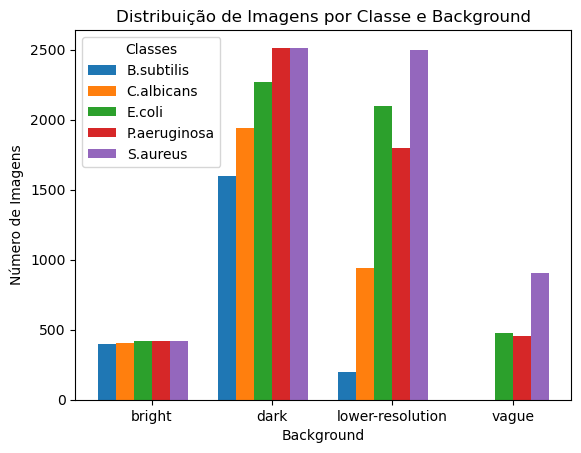

In [30]:
# Exemplo de uso
dataset_dir = r'C:\Users\bruna\OneDrive - Universidade do Minho\Tese Mestrado em Bioinformática\AGAR_dataset\AGAR_dataset\dataset'

contagens = contar_imagens(dataset_dir)
plotar_grafico(contagens)